## Load libraries and model

In [22]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.io.parsers import read_csv
from skimage.color import rgb2gray
from tensorflow import keras 
import os
from skimage import img_as_ubyte
from PIL import Image, ImageDraw,ImageFont
import face_recognition

In [23]:
import requests
from bs4 import BeautifulSoup
import time
from PIL import Image, ImageDraw
import face_recognition
import pandas as pd
import numpy as np
from os.path import basename
import math
import pathlib
from pathlib import Path
import os
import random
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw,ImageFont
import numpy as np
from tqdm import tqdm
import face_recognition

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
modelSeg = keras.models.load_model('2KImages_unet_neck_128')

In [55]:
%run -i face_shape_functions.py 

<Figure size 432x288 with 0 Axes>

## Predict with dataset the skin

*Using 1 sample image so you can see the way to go*

In [35]:
X = []

#path= 'prova.png'
path = './pics/square (508).jpg'
image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

image = cv2.resize(image, (128,128),interpolation = cv2.INTER_AREA)
X.append(image)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
X = np.array(X)

#Predict mask given image
XSkin=modelSeg.predict(X)

#Convert mask into black/white
grey_y_pred = cv2.cvtColor(XSkin[0],cv2.COLOR_BGR2RGB)

#Create the mixed image
Prova = img_as_ubyte(grey_y_pred)
Final_Image = np.where(Prova != 0, image, 0)
#im = Image.fromarray(Final_Image)
#im.save('NEW_rotated_pts.jpg', 'JPEG', quality = 100)

#fig, axs = plt.subplots(1,2,figsize=(12,12))

#axs[0,0].imshow(image)
#axs[0,1].imshow(grey_y_pred)

### Visualize

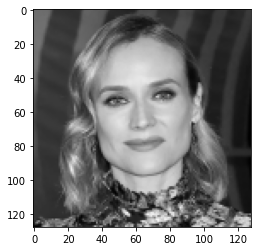

In [28]:
plt.imshow(image)

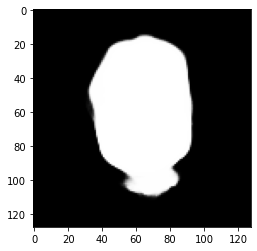

In [29]:
plt.imshow(grey_y_pred)

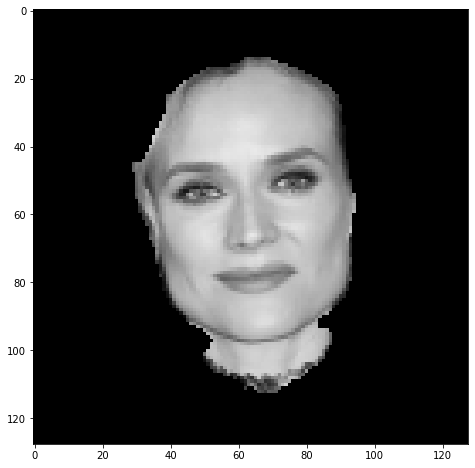

In [30]:
#Final_Image = cv2.resize(Final_Image, (320,320),interpolation = cv2.INTER_AREA)
plt.figure(figsize = (8,8))
plt.imshow(Final_Image)

# Combining two models

### EXAMPLES

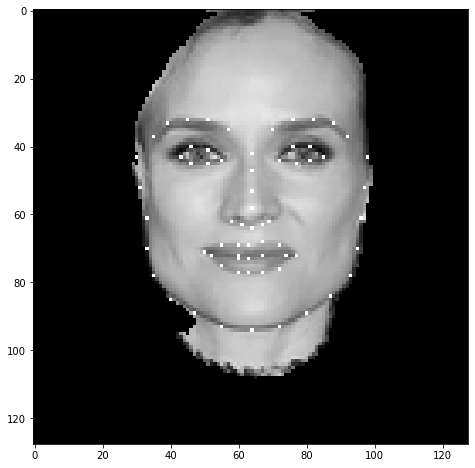

In [31]:
plt.figure(figsize = (8,8))
plt.imshow(img_resize_seg('./pics/square (508).jpg'))

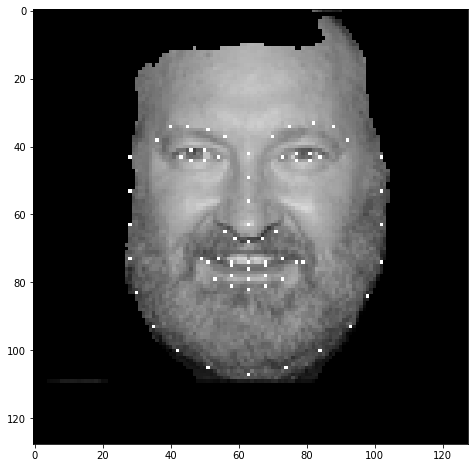

In [32]:
plt.figure(figsize = (8,8))
plt.imshow(img_resize_seg('./pics/28866.jpg'))

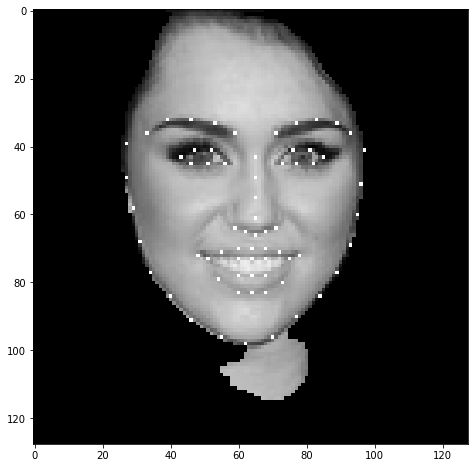

In [33]:
plt.figure(figsize = (8,8))
plt.imshow(img_resize_seg('./pics/heart (36).jpg_NEW_cropped.jpg'))

### Pre-processing

In [255]:
# FEMALE - TRAINING
df = pd.DataFrame(columns = ['0','1','2','3','4','5','6','7','8','9','10','11',	'12',	'13',	'14',	'15',	'16','17',
                             '18',	'19',	'20',	'21',	'22',	'23',	'24','25',	'26',	'27',	'28',	'29',
                             '30',	'31',	'32',	'33',	'34',	'35',	'36',	'37',	'38',	'39',	'40',	'41',
                             '42',	'43',	'44',	'45',	'46',	'47',	'48',	'49',	'50',	'51',	'52',	'53',
                             '54',	'55',	'56',	'57',	'58',	'59',	'60',	'61',	'62',	'63',	'64',	'65',
                             '66',	'67',	'68',	'69',	'70',	'71',	'72',	'73',	'74',	'75',	'76',	'77',
                             '78',	'79',	'80',	'81',	'82',	'83',	'84',	'85',	'86',	'87',	'88',	'89',
                             '90',	'91',	'92',	'93',	'94',	'95',	'96',	'97',	'98',	'99',	'100',	'101',
                             '102',	'103',	'104',	'105',	'106',	'107',	'108',	'109',	'110',	'111',	'112',	'113',
                             '114',	'115',	'116',	'117',	'118',	'119',	'120',	'121',	'122',	'123',	'124',	'125',
                             '126',	'127',	'128',	'129',	'130',	'131',	'132',	'133',	'134',	'135',	'136',	'137',
                             '138',	'139',	'140',	'141',	'142',	'143','A1','A2','A3','A4','A5','A6','A7','A8','A9',
                            'A10','A11','A12','A13','A14','A15','A16','Width','Height','H_W_Ratio','Jaw_width','J_F_Ratio',
                             'MJ_width','MJ_J_width'])

image_dir = "dataset/training_set/Female"
data = pd.DataFrame()
data.reset_index
shape_df = pd.DataFrame(columns = ['filenum','filename','classified_shape'])
shape_array = []
def store_features_and_classification():
    filenum = -1
    sub_dir = [q for q in pathlib.Path(image_dir).iterdir() if q.is_dir()]
    start_j = 0
    end_j = len(sub_dir)

    for j in range(start_j, end_j): # 1-5
        images_dir = [p for p in pathlib.Path(sub_dir[j]).iterdir() if p.is_file()]
        start_i = 0
        end_i = len(images_dir)
        
        for p in tqdm(range(start_i, end_i)):
            #print(images_dir[p])

            shape_array= []
            if 1 == 1:
                    face_file_name = os.path.basename(images_dir[p])
                    classified_face_shape = os.path.basename(os.path.dirname(images_dir[p])) 
                    filenum += 1
                    make_face_df(images_dir[p],filenum)
                    shape_array.append(filenum)
                    shape_array.append(face_file_name)  
                    shape_array.append(classified_face_shape)
                    shape_df.loc[filenum] = np.array(shape_array)
            
store_features_and_classification()  
data = pd.concat([df, shape_df], axis=1)

## SAVE THE DATA TO CSV
data.to_csv('female_training.csv')

 17%|█████████████▍                                                                   | 23/139 [00:10<01:16,  1.51it/s]

Error: facial feature is located below the chin.


100%|████████████████████████████████████████████████████████████████████████████████| 139/139 [01:09<00:00,  2.01it/s]


In [256]:
# MALE - TRAINING
df = pd.DataFrame(columns = ['0','1','2','3','4','5','6','7','8','9','10','11',	'12',	'13',	'14',	'15',	'16','17',
                             '18',	'19',	'20',	'21',	'22',	'23',	'24','25',	'26',	'27',	'28',	'29',
                             '30',	'31',	'32',	'33',	'34',	'35',	'36',	'37',	'38',	'39',	'40',	'41',
                             '42',	'43',	'44',	'45',	'46',	'47',	'48',	'49',	'50',	'51',	'52',	'53',
                             '54',	'55',	'56',	'57',	'58',	'59',	'60',	'61',	'62',	'63',	'64',	'65',
                             '66',	'67',	'68',	'69',	'70',	'71',	'72',	'73',	'74',	'75',	'76',	'77',
                             '78',	'79',	'80',	'81',	'82',	'83',	'84',	'85',	'86',	'87',	'88',	'89',
                             '90',	'91',	'92',	'93',	'94',	'95',	'96',	'97',	'98',	'99',	'100',	'101',
                             '102',	'103',	'104',	'105',	'106',	'107',	'108',	'109',	'110',	'111',	'112',	'113',
                             '114',	'115',	'116',	'117',	'118',	'119',	'120',	'121',	'122',	'123',	'124',	'125',
                             '126',	'127',	'128',	'129',	'130',	'131',	'132',	'133',	'134',	'135',	'136',	'137',
                             '138',	'139',	'140',	'141',	'142',	'143','A1','A2','A3','A4','A5','A6','A7','A8','A9',
                            'A10','A11','A12','A13','A14','A15','A16','Width','Height','H_W_Ratio','Jaw_width','J_F_Ratio',
                             'MJ_width','MJ_J_width'])

image_dir = "dataset/training_set/Male"
data = pd.DataFrame()
data.reset_index
shape_df = pd.DataFrame(columns = ['filenum','filename','classified_shape'])
shape_array = []
def store_features_and_classification():
    filenum = -1
    sub_dir = [q for q in pathlib.Path(image_dir).iterdir() if q.is_dir()]
    start_j = 0
    end_j = len(sub_dir)

    for j in range(start_j, end_j): # 1-5
        images_dir = [p for p in pathlib.Path(sub_dir[j]).iterdir() if p.is_file()]
        start_i = 0
        end_i = len(images_dir)
        #print(images_dir[j])
        
        for p in tqdm(range(start_i, end_i)):
            #print(images_dir[p])
            shape_array= []
            if 1 == 1:
                    face_file_name = os.path.basename(images_dir[p])
                    classified_face_shape = os.path.basename(os.path.dirname(images_dir[p])) 
                    filenum += 1
                    make_face_df(images_dir[p],filenum)
                    shape_array.append(filenum)
                    shape_array.append(face_file_name)  
                    shape_array.append(classified_face_shape)
                    shape_df.loc[filenum] = np.array(shape_array)
            
store_features_and_classification()  
data = pd.concat([df, shape_df], axis=1)

## SAVE THE DATA TO CSV
data.to_csv('male_training.csv')

  1%|█▏                                                                                | 2/140 [00:01<01:17,  1.78it/s]

Error: facial feature is located below the chin.


100%|████████████████████████████████████████████████████████████████████████████████| 140/140 [01:36<00:00,  1.46it/s]


In [257]:
# FEMALE - TESTING
df = pd.DataFrame(columns = ['0','1','2','3','4','5','6','7','8','9','10','11',	'12',	'13',	'14',	'15',	'16','17',
                             '18',	'19',	'20',	'21',	'22',	'23',	'24','25',	'26',	'27',	'28',	'29',
                             '30',	'31',	'32',	'33',	'34',	'35',	'36',	'37',	'38',	'39',	'40',	'41',
                             '42',	'43',	'44',	'45',	'46',	'47',	'48',	'49',	'50',	'51',	'52',	'53',
                             '54',	'55',	'56',	'57',	'58',	'59',	'60',	'61',	'62',	'63',	'64',	'65',
                             '66',	'67',	'68',	'69',	'70',	'71',	'72',	'73',	'74',	'75',	'76',	'77',
                             '78',	'79',	'80',	'81',	'82',	'83',	'84',	'85',	'86',	'87',	'88',	'89',
                             '90',	'91',	'92',	'93',	'94',	'95',	'96',	'97',	'98',	'99',	'100',	'101',
                             '102',	'103',	'104',	'105',	'106',	'107',	'108',	'109',	'110',	'111',	'112',	'113',
                             '114',	'115',	'116',	'117',	'118',	'119',	'120',	'121',	'122',	'123',	'124',	'125',
                             '126',	'127',	'128',	'129',	'130',	'131',	'132',	'133',	'134',	'135',	'136',	'137',
                             '138',	'139',	'140',	'141',	'142',	'143','A1','A2','A3','A4','A5','A6','A7','A8','A9',
                            'A10','A11','A12','A13','A14','A15','A16','Width','Height','H_W_Ratio','Jaw_width','J_F_Ratio',
                             'MJ_width','MJ_J_width'])

image_dir = "dataset/testing_set/Female"
data = pd.DataFrame()
data.reset_index
shape_df = pd.DataFrame(columns = ['filenum','filename','classified_shape'])
shape_array = []
def store_features_and_classification():
    filenum = -1
    sub_dir = [q for q in pathlib.Path(image_dir).iterdir() if q.is_dir()]
    start_j = 0
    end_j = len(sub_dir)

    for j in range(start_j, end_j): # 1-5
        images_dir = [p for p in pathlib.Path(sub_dir[j]).iterdir() if p.is_file()]
        start_i = 0
        end_i = len(images_dir)
        #print(images_dir[j])
        
        for p in tqdm(range(start_i, end_i)):

            shape_array= []
            if 1 == 1:
                    face_file_name = os.path.basename(images_dir[p])
                    classified_face_shape = os.path.basename(os.path.dirname(images_dir[p])) 
                    filenum += 1
                    make_face_df(images_dir[p],filenum)
                    shape_array.append(filenum)
                    shape_array.append(face_file_name)  
                    shape_array.append(classified_face_shape)
                    shape_df.loc[filenum] = np.array(shape_array)
            
store_features_and_classification()  
data = pd.concat([df, shape_df], axis=1)

## SAVE THE DATA TO CSV
data.to_csv('female_testing.csv')

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.84it/s]


In [258]:
# MALE - TESTING
df = pd.DataFrame(columns = ['0','1','2','3','4','5','6','7','8','9','10','11',	'12',	'13',	'14',	'15',	'16','17',
                             '18',	'19',	'20',	'21',	'22',	'23',	'24','25',	'26',	'27',	'28',	'29',
                             '30',	'31',	'32',	'33',	'34',	'35',	'36',	'37',	'38',	'39',	'40',	'41',
                             '42',	'43',	'44',	'45',	'46',	'47',	'48',	'49',	'50',	'51',	'52',	'53',
                             '54',	'55',	'56',	'57',	'58',	'59',	'60',	'61',	'62',	'63',	'64',	'65',
                             '66',	'67',	'68',	'69',	'70',	'71',	'72',	'73',	'74',	'75',	'76',	'77',
                             '78',	'79',	'80',	'81',	'82',	'83',	'84',	'85',	'86',	'87',	'88',	'89',
                             '90',	'91',	'92',	'93',	'94',	'95',	'96',	'97',	'98',	'99',	'100',	'101',
                             '102',	'103',	'104',	'105',	'106',	'107',	'108',	'109',	'110',	'111',	'112',	'113',
                             '114',	'115',	'116',	'117',	'118',	'119',	'120',	'121',	'122',	'123',	'124',	'125',
                             '126',	'127',	'128',	'129',	'130',	'131',	'132',	'133',	'134',	'135',	'136',	'137',
                             '138',	'139',	'140',	'141',	'142',	'143','A1','A2','A3','A4','A5','A6','A7','A8','A9',
                            'A10','A11','A12','A13','A14','A15','A16','Width','Height','H_W_Ratio','Jaw_width','J_F_Ratio',
                             'MJ_width','MJ_J_width'])

image_dir = "dataset/testing_set/Male"
data = pd.DataFrame()
data.reset_index
shape_df = pd.DataFrame(columns = ['filenum','filename','classified_shape'])
shape_array = []
def store_features_and_classification():
    filenum = -1
    sub_dir = [q for q in pathlib.Path(image_dir).iterdir() if q.is_dir()]
    start_j = 0
    end_j = len(sub_dir)

    for j in range(start_j, end_j): # -5
        images_dir = [p for p in pathlib.Path(sub_dir[j]).iterdir() if p.is_file()]
        start_i = 0
        end_i = len(images_dir)
        #print(images_dir[j])
        
        for p in tqdm(range(start_i, end_i)):

            shape_array= []
            if 1 == 1:
                    face_file_name = os.path.basename(images_dir[p])
                    classified_face_shape = os.path.basename(os.path.dirname(images_dir[p])) 
                    filenum += 1
                    make_face_df(images_dir[p],filenum)
                    shape_array.append(filenum)
                    shape_array.append(face_file_name)  
                    shape_array.append(classified_face_shape)
                    shape_df.loc[filenum] = np.array(shape_array)
            
store_features_and_classification()  
data = pd.concat([df, shape_df], axis=1)

## SAVE THE DATA TO CSV
data.to_csv('male_testing.csv')

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.70it/s]


### Model 

In [36]:
# LOAD DATA FILE - TRAINING
female = pd.read_csv('female_training.csv',index_col = None)
#female = pd.read_csv('all_female_training.csv',index_col = None)
female = female.drop('Unnamed: 0',axis = 1)
female = female.dropna(axis=0, how='any')
print('Shape of the Female Training Dataset: ',female.shape)

male = pd.read_csv('male_training.csv',index_col = None)
male = male.drop('Unnamed: 0',axis = 1)
male = male.dropna(axis=0, how='any')
print('\nShape of the Male Training Dataset: ',male.shape)

male['Sex']='Male'
female['Sex']='Female'
data = pd.concat([male,female])
print('\nShape of the Training Dataset: ',data.shape)

Shape of the Female Training Dataset:  (698, 170)

Shape of the Male Training Dataset:  (697, 170)

Shape of the Training Dataset:  (1395, 171)


In [37]:
# LOAD DATA FILE - TESTING
female_test = pd.read_csv('female_testing.csv',index_col = None)
#female_test = pd.read_csv('all_female_testing.csv',index_col = None)
female_test = female_test.drop('Unnamed: 0',axis = 1)
female_test = female_test.dropna(axis=0, how='any')
print('Shape of the Female Testing Dataset: ',female_test.shape)

male_test = pd.read_csv('male_testing.csv',index_col = None)
male_test = male_test.drop('Unnamed: 0',axis = 1)
male_test = male_test.dropna(axis=0, how='any')
print('\nShape of the Male Testing Dataset: ',male_test.shape)

# Creatin a indicator for SEX
male_test['Sex']='Male'
female_test['Sex']='Female'
data_test = pd.concat([male_test,female_test])
print('\nShape of the Training Dataset: ',data_test.shape)

Shape of the Female Testing Dataset:  (51, 170)

Shape of the Male Testing Dataset:  (50, 170)

Shape of the Training Dataset:  (101, 171)


In [38]:
X_train = data.drop(['filenum','filename','classified_shape','Sex'] , axis = 1)
y_train = data['classified_shape']

In [39]:
X_test = data_test.drop(['filenum','filename','classified_shape','Sex'] , axis = 1)
y_test = data_test['classified_shape']

In [40]:
## Scaling
#from sklearn.preprocessing import StandardScaler 
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [41]:
# Saving scaler
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
joblib.dump(sc, 'std_scaler.bin', compress=True)

['std_scaler.bin']

In [42]:
sc=joblib.load('std_scaler.bin')

In [43]:
X_test_scaled = sc.transform(X_test)

### Analysis of the results *MLP 2*

In [44]:
# MLP 2
from sklearn import metrics
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier

best_mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       learning_rate_init=0.01, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=525,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

best_mlp.fit(X_train_scaled, y_train)

yhat = best_mlp.predict(X_train_scaled)
yhat2 = best_mlp.predict(X_test_scaled)
yhat2_prob = best_mlp.predict_proba(X_test_scaled)
print('In sample accuracy:',metrics.accuracy_score(yhat, y_train))
print('Out of sample accuracy:',metrics.accuracy_score(yhat2, y_test))

In sample accuracy: 0.9634408602150538
Out of sample accuracy: 0.7326732673267327


In [45]:
# Saving the model
import joblib
filename = 'model_face_shape.sav'
joblib.dump(best_mlp, filename)

['model_face_shape.sav']

In [46]:
data_test['Prediction']=yhat2
shapes=['Heart', 'Oblong', 'Oval', 'Round', 'Square']
data_test[shapes] = np.around(yhat2_prob, 3)
# MIS-CLASSIFIED
data_test_miss = data_test[data_test['classified_shape']!=data_test['Prediction']][['filename','Sex','classified_shape', 'Prediction','Heart', 'Oblong', 'Oval', 'Round', 'Square']]
data_test_miss

filename     Sex classified_shape Prediction  Heart  Oblong  \
0       Heart108.png    Male            Heart      Round  0.002   0.000   
2       Heart140.png    Male            Heart     Square  0.162   0.008   
6        Heart70.png    Male            Heart     Oblong  0.040   0.871   
8        Heart88.png    Male            Heart     Oblong  0.206   0.696   
12     Oblong112.png    Male           Oblong     Square  0.010   0.111   
15     Oblong137.png    Male           Oblong       Oval  0.056   0.036   
17      Oblong57.png    Male           Oblong      Heart  0.925   0.073   
20       Oval101.png    Male             Oval      Round  0.000   0.001   
21       Oval116.png    Male             Oval     Oblong  0.020   0.975   
24       Oval140.png    Male             Oval      Round  0.012   0.000   
26        Oval78.png    Male             Oval     Square  0.099   0.020   
28        Oval89.png    Male             Oval      Round  0.064   0.000   
30      Round106.png    Male            Round      Heart  0.912   0.003   
34      Round153.png    Male            Round     Square  0.008   0.007   
43     Square149.png    Male           Square       Oval  0.349   0.019   
46      Square39.png    Male           Square      Round  0.014   0.123   
47      Square71.png    Male           Square      Heart  0.705   0.014   
48      Square79.png    Male           Square     Oblong  0.003   0.857   
7    heart (834).jpg  Female            Heart       Oval  0.293   0.016   
23    oval (177).jpg  Female             Oval     Oblong  0.287   0.667   
24     oval (31).jpg  Female             Oval      Round  0.018   0.006   
28    oval (552).jpg  Female             Oval      Heart  0.649   0.005   
29    oval (590).jpg  Female             Oval      Heart  0.790   0.001   
34   round (294).jpg  Female            Round     Square  0.003   0.000   
37   round (525).jpg  Female            Round       Oval  0.186   0.000   
39   round (560).jpg  Female            Round      Heart  0.350   0.000   
47  square (476).jpg  Female           Square      Round  0.012   0.000   

     Oval  Round  Square  
0   0.004  0.994   0.000  
2   0.054  0.041   0.734  
6   0.027  0.013   0.050  
8   0.092  0.004   0.003  
12  0.020  0.021   0.838  
15  0.502  0.040   0.366  
17  0.002  0.000   0.001  
20  0.288  0.665   0.046  
21  0.003  0.000   0.002  
24  0.018  0.969   0.001  
26  0.298  0.240   0.343  
28  0.007  0.921   0.008  
30  0.033  0.031   0.020  
34  0.140  0.009   0.836  
43  0.472  0.017   0.143  
46  0.042  0.724   0.096  
47  0.024  0.000   0.257  
48  0.002  0.000   0.138  
7   0.685  0.000   0.006  
23  0.040  0.006   0.000  
24  0.231  0.726   0.018  
28  0.296  0.050   0.000  
29  0.067  0.088   0.054  
34  0.015  0.299   0.684  
37  0.429  0.359   0.026  
39  0.251  0.265   0.134  
47  0.265  0.380   0.343

In [47]:
data_test_miss['Result'] = data_test_miss[['Sex','classified_shape', 'Prediction']].agg('-'.join, axis=1)

In [48]:
pd.value_counts(data_test_miss['Result'])

Male-Oval-Round        3
Female-Oval-Heart      2
Male-Heart-Oblong      2
Female-Round-Heart     1
Male-Heart-Round       1
Male-Heart-Square      1
Male-Oval-Oblong       1
Male-Round-Square      1
Male-Square-Oval       1
Female-Heart-Oval      1
Male-Oval-Square       1
Male-Square-Oblong     1
Female-Square-Round    1
Male-Oblong-Square     1
Male-Round-Heart       1
Female-Oval-Oblong     1
Male-Square-Round      1
Male-Square-Heart      1
Male-Oblong-Heart      1
Female-Round-Square    1
Female-Oval-Round      1
Female-Round-Oval      1
Male-Oblong-Oval       1
Name: Result, dtype: int64

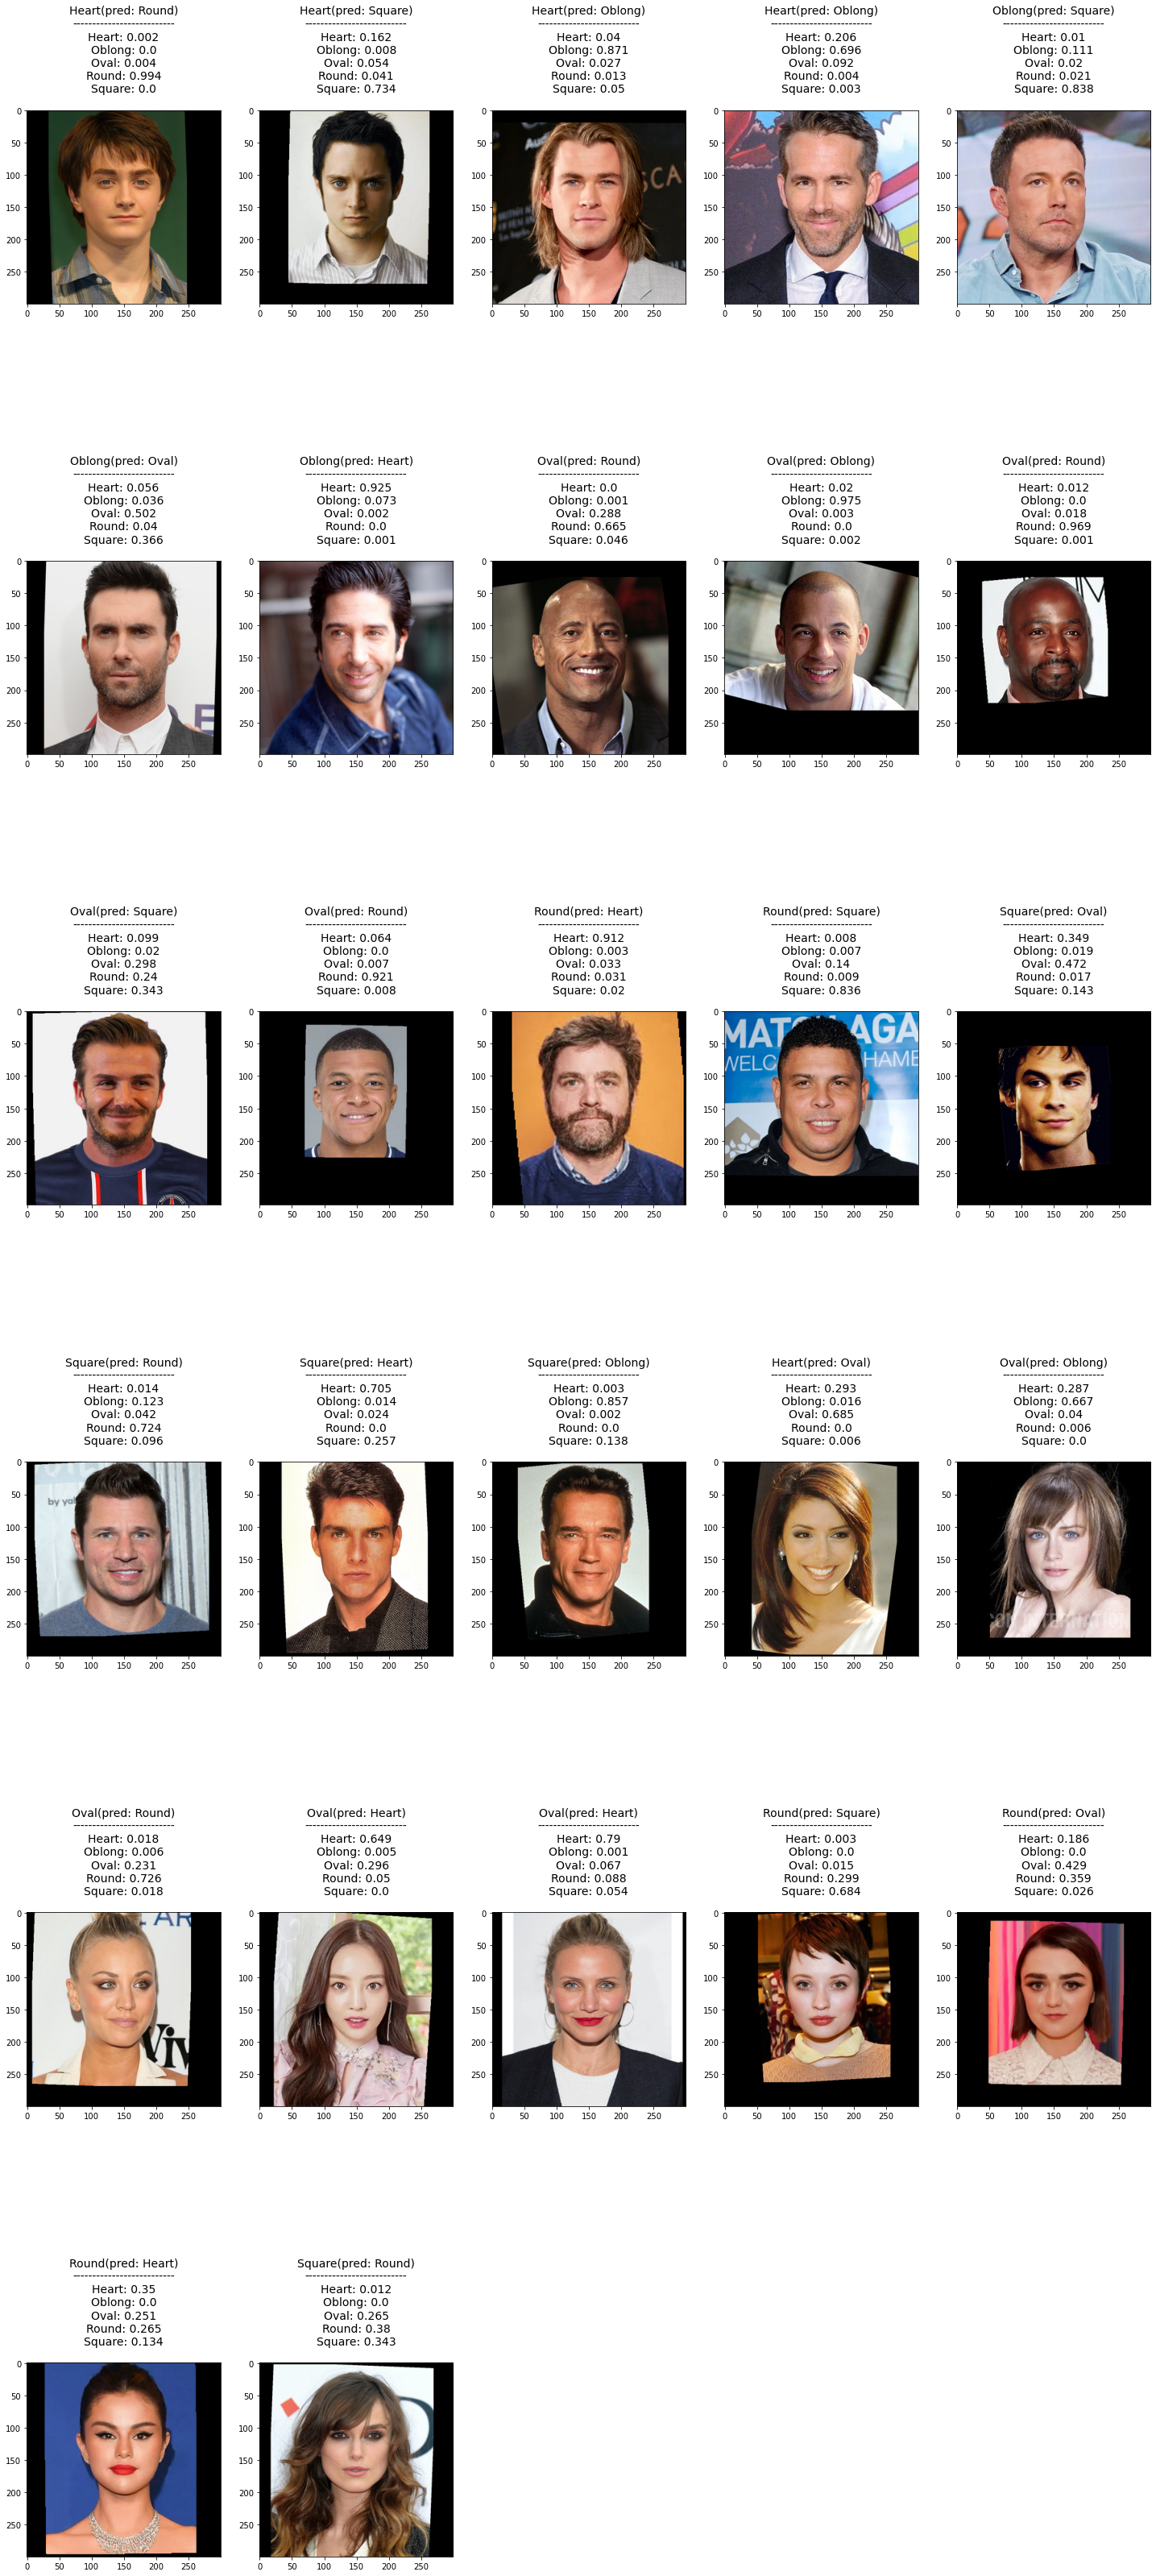

In [52]:
# Missclasified images
plt.figure(figsize = (25,60))

for i in range(0,data_test_miss.shape[0]):
    a = './dataset/testing_set/'+ data_test_miss.values[i][1]+'/'+data_test_miss.values[i][2]+'/'+data_test_miss.values[i][0]
    x = np.ceil(data_test_miss.shape[0]/5)
    plt.subplot(x,5,i+1)
    #img = Image.open(a)
    img = img_resize(a)
    #draw = ImageDraw.Draw(img)
    t = data_test_miss.values[i][2]+'(pred: '+data_test_miss.values[i][3] +')'+'\n--------------------------'
    pred=''
    for j in range(0,len(shapes)):
        pred = str(pred) + shapes[j]+': '+str(data_test_miss.values[i][j+4])+'\n'
    plt.title(t+'\n'+pred, fontsize = 14)
    plt.imshow(img)
    #img.close()

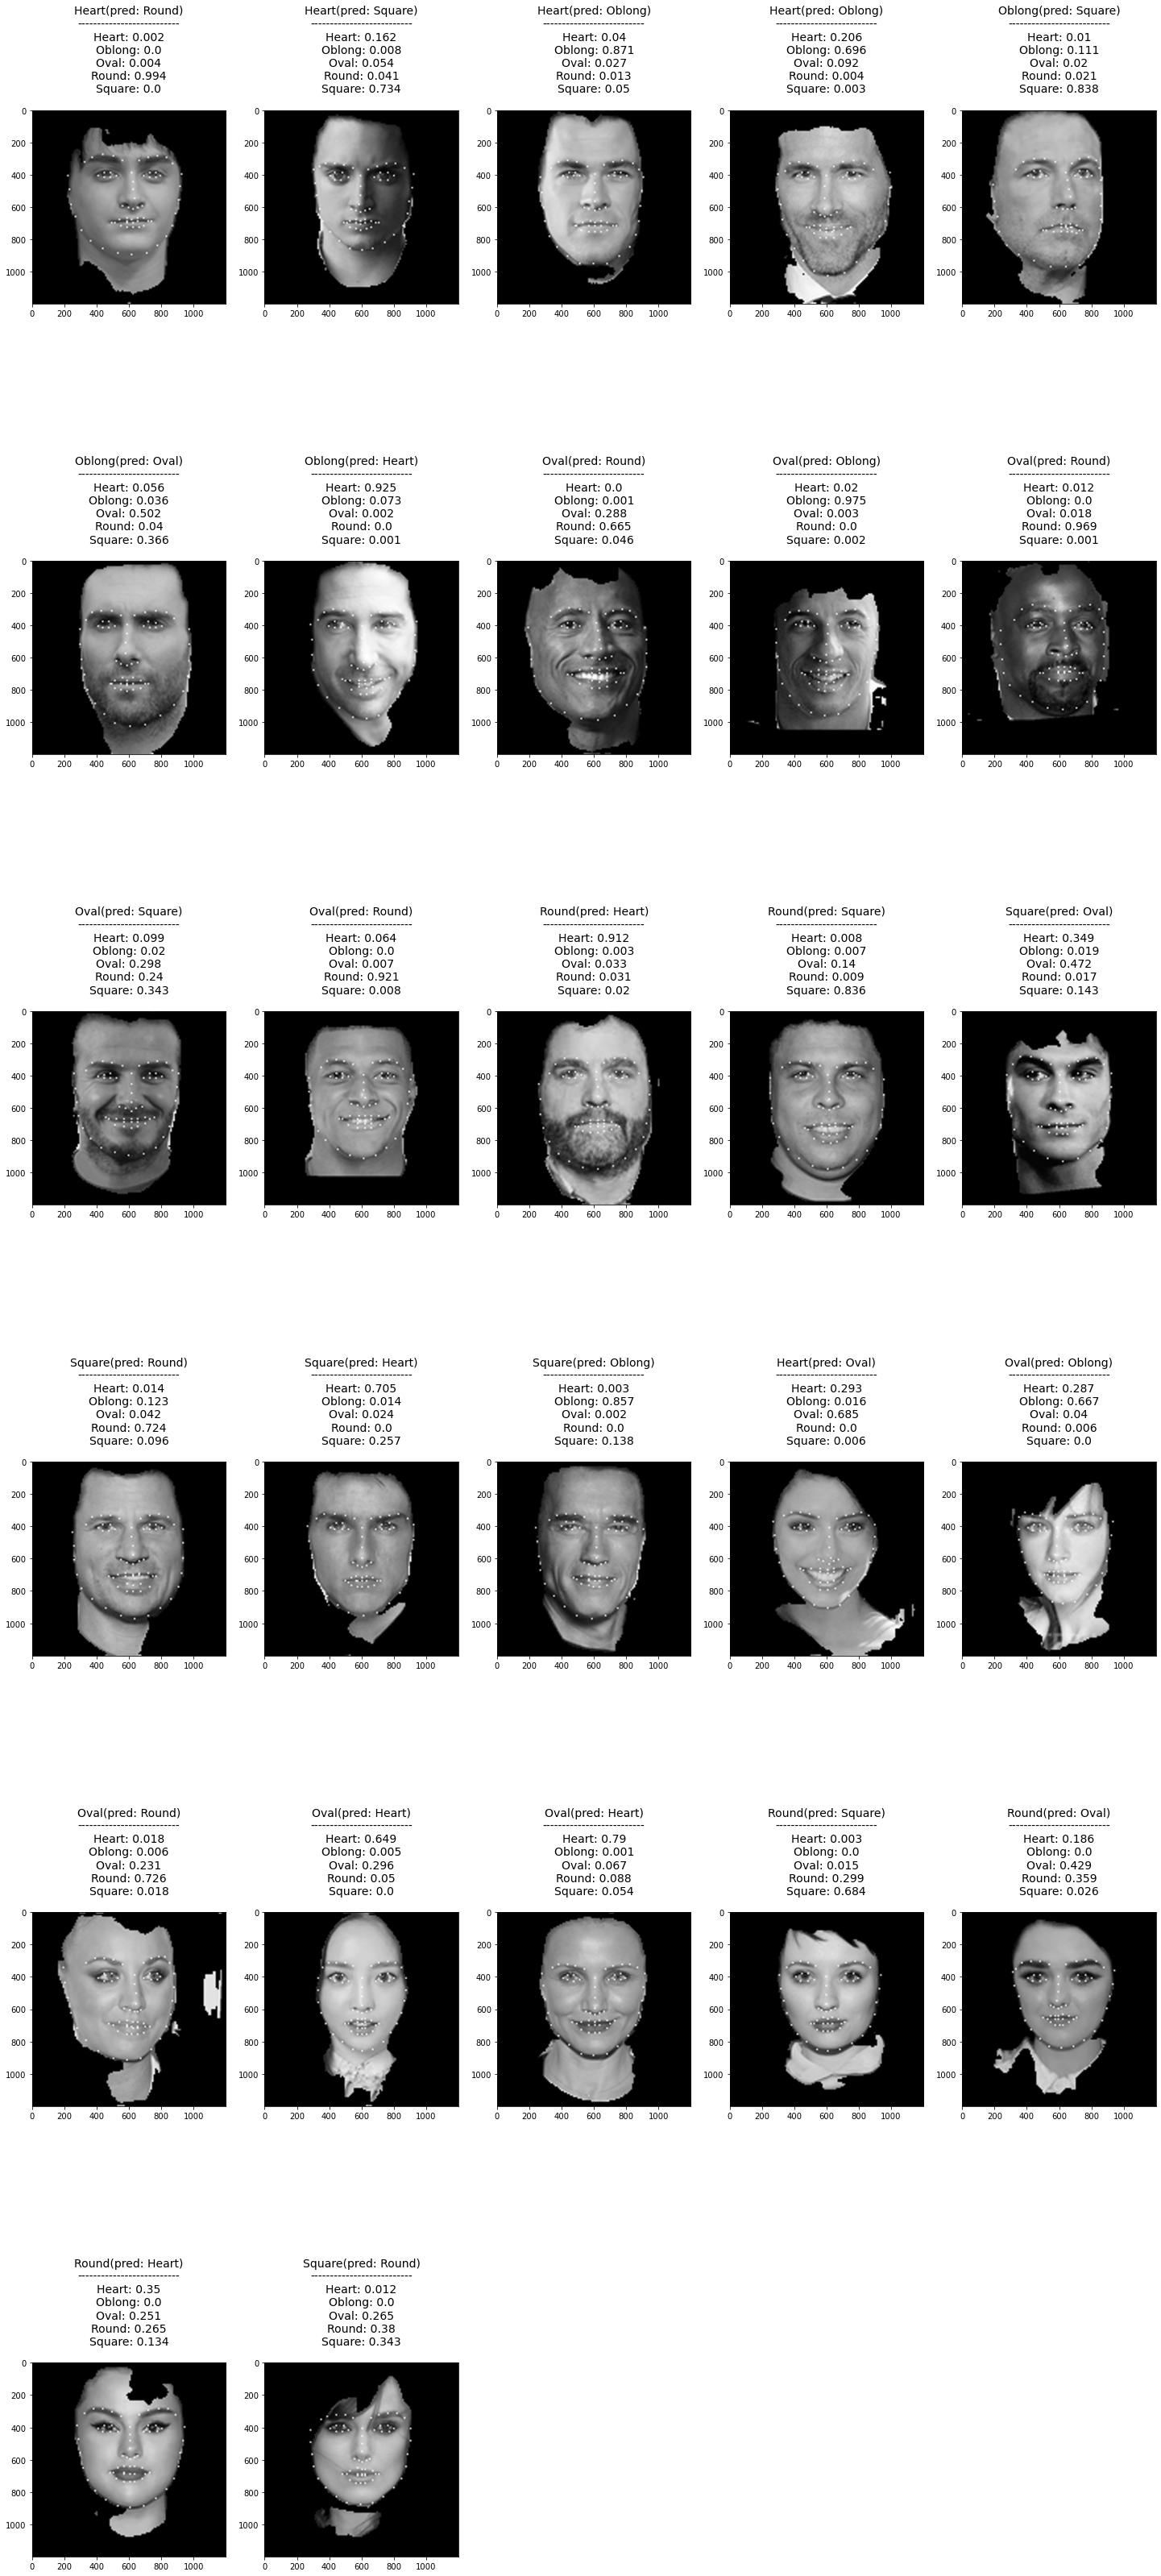

In [50]:
# Missclasified images + face landmarks
plt.figure(figsize = (25,60))

for i in range(0,data_test_miss.shape[0]):
    a = './dataset/testing_set/'+ data_test_miss.values[i][1]+'/'+data_test_miss.values[i][2]+'/'+data_test_miss.values[i][0]
    x = np.ceil(data_test_miss.shape[0]/5)
    plt.subplot(x,5,i+1)
    #img = Image.open(a)
    img = img_resize_seg(a)
    img = img.resize((1200,1200))
    #draw = ImageDraw.Draw(img)
    t = data_test_miss.values[i][2]+'(pred: '+data_test_miss.values[i][3] +')'+'\n--------------------------'
    pred=''
    for j in range(0,len(shapes)):
        pred = str(pred) + shapes[j]+': '+str(data_test_miss.values[i][j+4])+'\n'
    plt.title(t+'\n'+pred, fontsize = 14)
    plt.imshow(img)
    #img.close()

### EXAMPLE

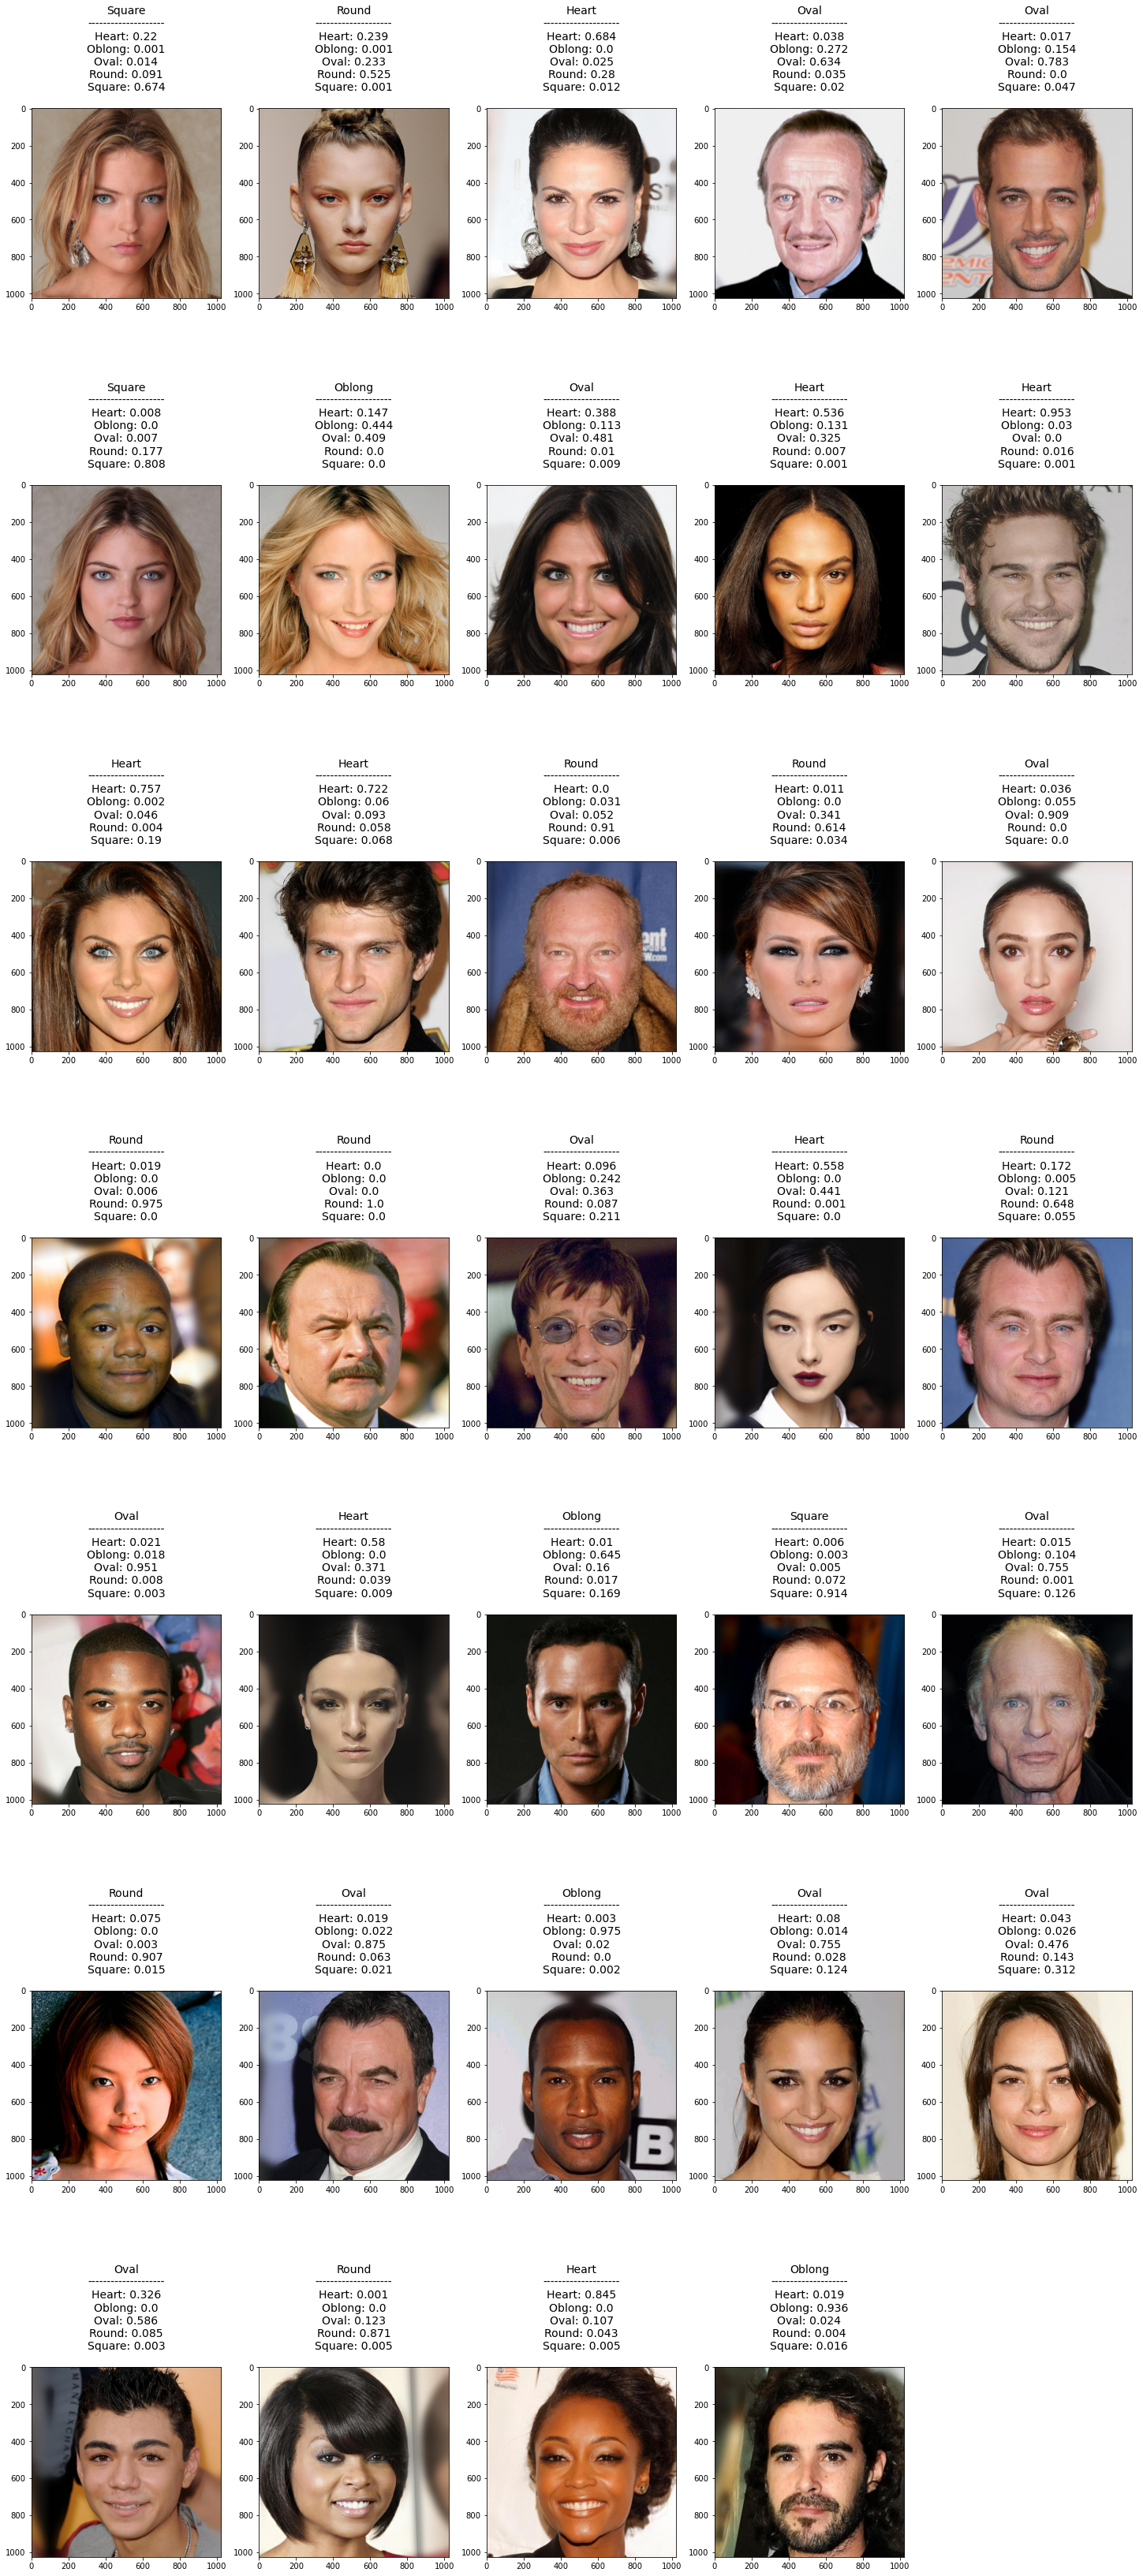

In [58]:
photos = ['./dataset/example_set/5.jpg',
          './dataset/example_set/7.jpg',
          './dataset/example_set/36.jpg',
          './dataset/example_set/37.jpg',
          './dataset/example_set/39.jpg',
          './dataset/example_set/66.jpg',
          './dataset/example_set/72.jpg',
          './dataset/example_set/74.jpg',
          './dataset/example_set/103.jpg',
          './dataset/example_set/28673.jpg',
          './dataset/example_set/28753.jpg',
          './dataset/example_set/28766.jpg',
          './dataset/example_set/28866.jpg',
          './dataset/example_set/29254.jpg',
          './dataset/example_set/29585.jpg',
          './dataset/example_set/10.jpg',
          './dataset/example_set/1007.jpg',
          './dataset/example_set/10000.jpg',
          './dataset/example_set/10014.jpg',
          './dataset/example_set/10040.jpg',
          './dataset/example_set/10042.jpg',
          './dataset/example_set/10053.jpg',
          './dataset/example_set/10614.jpg',
          './dataset/example_set/11115.jpg',
          './dataset/example_set/28943.jpg',
          './dataset/example_set/28955.jpg',
          './dataset/example_set/29194.jpg',
          './dataset/example_set/29542.jpg',
          './dataset/example_set/29620.jpg',
          './dataset/example_set/29643.jpg',
          './dataset/example_set/29786.jpg',
          './dataset/example_set/29790.jpg',
          './dataset/example_set/29817.jpg',
          './dataset/example_set/28295.jpg']

shapes=['Heart', 'Oblong', 'Oval', 'Round', 'Square']

plt.figure(figsize = (25,60))
for i in range(0,len(photos)):
    file_num = i+1
    my_photo = photos[i]
    df = make_face_df_save(my_photo,file_num)
    
    test_row = df.loc[file_num].values.reshape(1,-1)
    test_row = sc.transform(test_row)  
    test_shape = best_mlp.predict(test_row)
    test_shape_prob = np.around(best_mlp.predict_proba(test_row), 3)
    #print(test_shape)
    
    x = np.ceil(len(photos)/5)
    plt.subplot(x,5,i+1)
    #plt.figure(figsize = (6,6))
    new_photo = my_photo
    img = Image.open(new_photo)
    draw = ImageDraw.Draw(img)
    
    t = test_shape[0]+'\n--------------------'
    pred=''
    for j in range(0,len(shapes)):
        pred = str(pred) + shapes[j]+': '+str(test_shape_prob[0][j])+'\n'
        
    plt.title(t+'\n'+pred, fontsize = 14)
    plt.imshow(img)
    img.close()

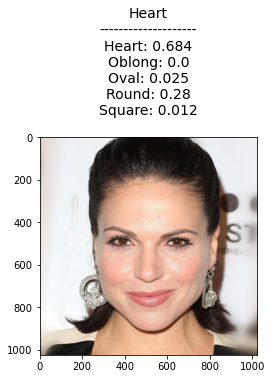

In [61]:
x = face_shape('./dataset/example_set/36.jpg')

In [62]:
x

'Heart'

In [336]:
# Increasing the size of the pictures from 128x128 could help (SPRINT 4)